# Standard pipeline

This notebook demonstrates the basic usage of the functions in the repository

In [1]:
import numpy as np
import sampling as smp
import recovery as rec
import graphs_signals as gs
import matplotlib.pyplot as plt

import utils
import pygsp
import plotting

%matplotlib inline
plt.style.use('seaborn-colorblind')
pygsp.plotting.BACKEND = 'matplotlib'

## Load graph and signal

In [2]:
n_vertices = 1000

# Stochastic Block Model with 2 communities, having a 80/20 size imbalance
graph, indicator_vectors = gs.ssbm(n_vertices, 2, a=2., b=0.5)

gt_signal = indicator_vectors[-1, :] # Indicator vector of the last community

## Set the sampling design

In [3]:
smp_design = lambda g, m: smp.uniform_vertex(g, m, replace=False) # Uniform at random

## Draw samples from the signal

In [4]:
m = int(0.3 * graph.n_vertices) # Number of measurements

sampled_vertices = smp_design(graph, m)
sampled_values = gt_signal[sampled_vertices]

y = utils.nan_off_sample(graph.n_vertices, sampled_vertices, sampled_values) # For plotting purposes

## Set the recovery function

In [5]:
# Graph Total-Variation interpolation: good for piecewise-constant signals
rec_fun = lambda g, s_ver, s_val: rec.tv_interpolation(g, 
                                                       s_ver, 
                                                       s_val, 
                                                       rtol=1e-6 * (graph.n_vertices ** (-1/2)), 
                                                       maxit=5000, 
                                                       verbosity='NONE')

## Decode the signal and measure the error

In [6]:
# Recover
rec_vec = rec_fun(graph, sampled_vertices, sampled_values)

# Measure the error
rel_err = np.linalg.norm(rec_vec - gt_signal, ord=2) / np.linalg.norm(gt_signal, ord=2)

## Plot each stage

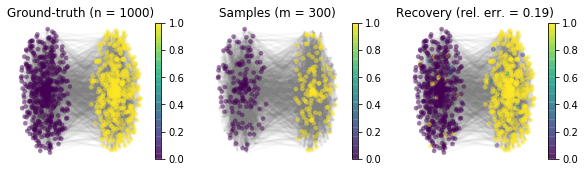

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 2.5))

limits = [min(gt_signal), max(gt_signal)]

plotting.plot_graph(graph, 
                    gt_signal, 
                    ax=ax[0], 
                    limits=limits, 
                    edges=True, 
                    colorbar=True)

plotting.plot_graph(graph, 
                    y, 
                    ax=ax[1], 
                    limits=limits, 
                    edges=True, 
                    colorbar=True)

plotting.plot_graph(graph, 
                    rec_vec, 
                    ax=ax[2], 
                    limits=limits, 
                    edges=True, 
                    colorbar=True)

ax[0].set(title='Ground-truth (n = {0})'.format(graph.n_vertices))
ax[1].set(title='Samples (m = {0})'.format(m))
ax[2].set(title='Recovery (rel. err. = {0:.2f})'.format(rel_err))

plt.show()